<a href="https://colab.research.google.com/github/CodiPop/FinalOpti/blob/main/Copia_de_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Accidentalidad_en_Barranquilla.csv")
df.columns = [col.replace("\n", " ").strip() for col in df.columns]

In [ ]:
df

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,01/01/2015 12:00:00 AM,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1,0,1
1,01/01/2015 12:00:00 AM,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,0,0,1
2,01/01/2015 12:00:00 AM,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,0,0,1
3,01/01/2015 12:00:00 AM,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2,0,1
4,01/01/2015 12:00:00 AM,2015,1,Jue,04:20:00:AM,Solo daños,Choque,CRA 15 CLLE 21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37239,09/30/2021 12:00:00 AM,2021,9,Jue,06:20:00:PM,Con heridos,Atropello,CARRERA 15 SUR CON CALLE 73,2,0,1
37240,09/30/2021 12:00:00 AM,2021,9,Jue,08:10:00:AM,Con heridos,Choque,CARRERA 56 FRENTE # 68 157,1,0,1
37241,09/30/2021 12:00:00 AM,2021,9,Jue,08:15:00:PM,Con heridos,Choque,CR 20 24 114,1,0,1
37242,09/30/2021 12:00:00 AM,2021,9,Jue,09:30:00:AM,Solo daños,Choque,CR 25B 74B 94,0,0,1


## **Analisis Exploratorio**

In [ ]:
import seaborn as sns

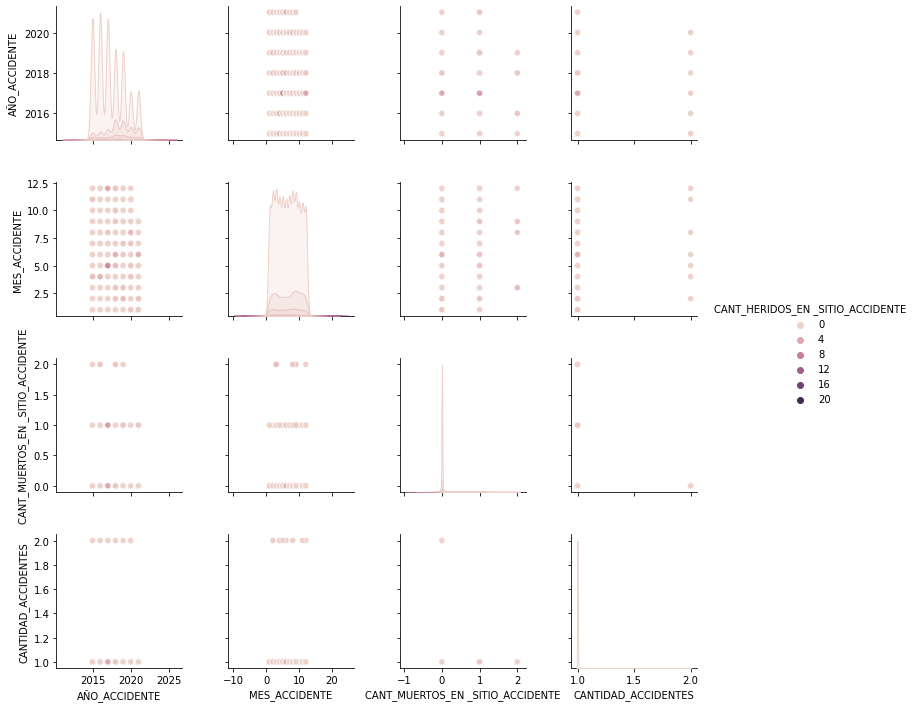

In [ ]:
sns.pairplot(data=df, hue='CANT_HERIDOS_EN _SITIO_ACCIDENTE')

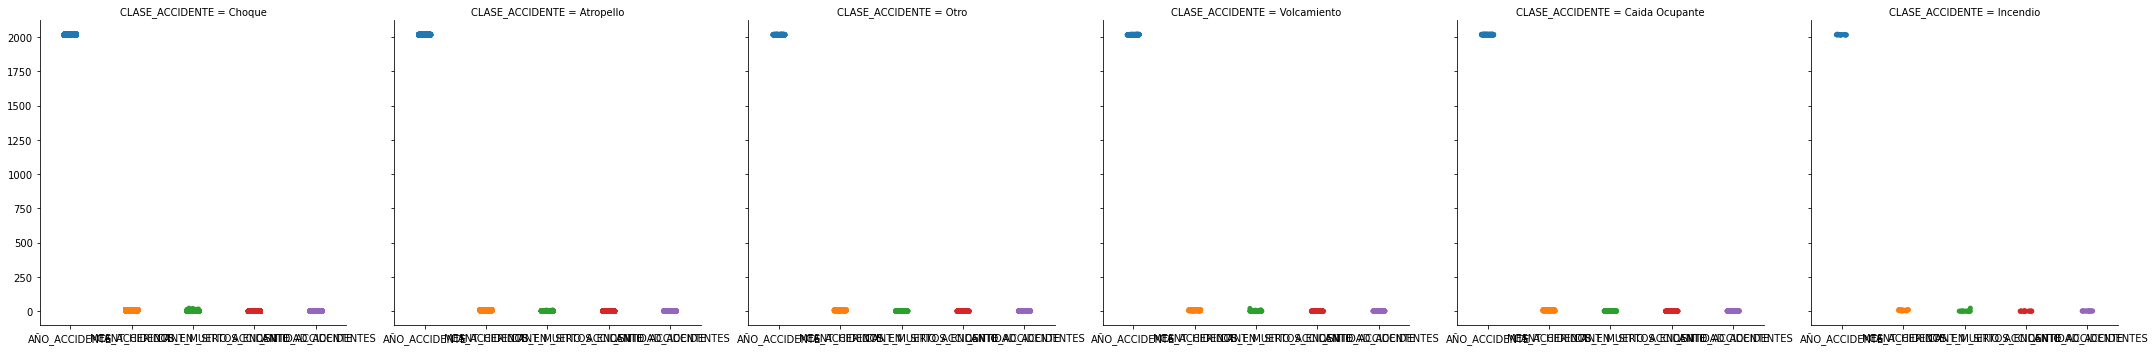

In [ ]:
sns.catplot(data=df, col='CLASE_ACCIDENTE' )

# Graficas

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

## Grafica 1

Cantidad de heridos y muertos por cada tipo de accidente

In [ ]:
df1 = df.copy()
df1 = df1[["GRAVEDAD_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CLASE_ACCIDENTE"]]
df1 = df1.groupby("CLASE_ACCIDENTE").sum().reset_index()
df1 = df1.sort_values(by='CANT_HERIDOS_EN _SITIO_ACCIDENTE', ascending=False)



fig = px.bar(df1,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",  labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df2 = df.copy()
df2 = df2.groupby("CLASE_ACCIDENTE").sum().reset_index()
df2 = df2.sort_values(by='CANT_MUERTOS_EN _SITIO_ACCIDENTE', ascending=False)
fig = px.bar(df2,y="CANT_MUERTOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",labels={
                     "CANT_MUERTOS_EN _SITIO_ACCIDENTE": "Cantidad de muertos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df1

,CLASE_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE
2,Choque,8980
0,Atropello,1677
1,Caida Ocupante,163
5,Volcamiento,130
4,Otro,121
3,Incendio,22


## Grafica 2

In [ ]:
df3 = df.copy()

df3 = df3[["AÑO_ACCIDENTE","MES_ACCIDENTE","DIA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df4 = df3[["MES_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df3 = df3.groupby("AÑO_ACCIDENTE").sum().reset_index()
df4 = df4.groupby("MES_ACCIDENTE").sum().reset_index()



In [ ]:
df4["MES_ACCIDENTE"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: MES_ACCIDENTE, dtype: int64

In [ ]:
fig = px.bar(df3,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="AÑO_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "AÑO_ACCIDENTE": "Año",
                 })
fig.show()
fig = px.bar(df4,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="MES_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "MES_ACCIDENTE": "Mes",
                 })
fig.show()

## Grafica 3

In [ ]:
df5 = df.copy()
df5 = df5[["HORA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df5 = df5.groupby("HORA_ACCIDENTE").sum().reset_index()
df5["HORA_ACCIDENTE"] = pd.to_datetime(df5["HORA_ACCIDENTE"],format='%I:%M:%S:%p')
df5["HORA_ACCIDENTE_FORMATO"] =df5["HORA_ACCIDENTE"].dt.strftime("%H")
df5 = df5.groupby(["HORA_ACCIDENTE_FORMATO"]).sum().reset_index()[["HORA_ACCIDENTE_FORMATO","CANTIDAD_ACCIDENTES"]]
df5.columns = ["Hora","Cantidad"]
df5 = df5.sort_values(by=['Hora'])

In [ ]:
fig = px.bar(df5,x="Hora",y="Cantidad")
fig.show()

AÑO_ACCIDENTE                          AxesSubplot(0.125,0.749828;0.133621x0.130172)
MES_ACCIDENTE                       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
CANT_HERIDOS_EN _SITIO_ACCIDENTE     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
CANT_MUERTOS_EN _SITIO_ACCIDENTE    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
CANTIDAD_ACCIDENTES                 AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

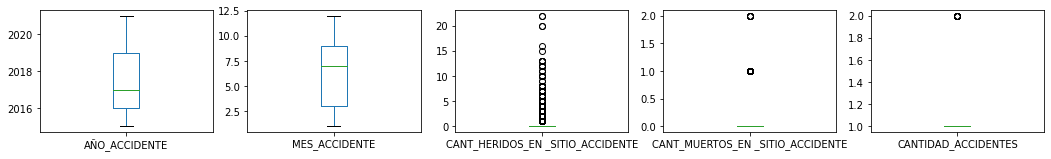

In [ ]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(18,13))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e1c1171d0>,
      dtype=object)

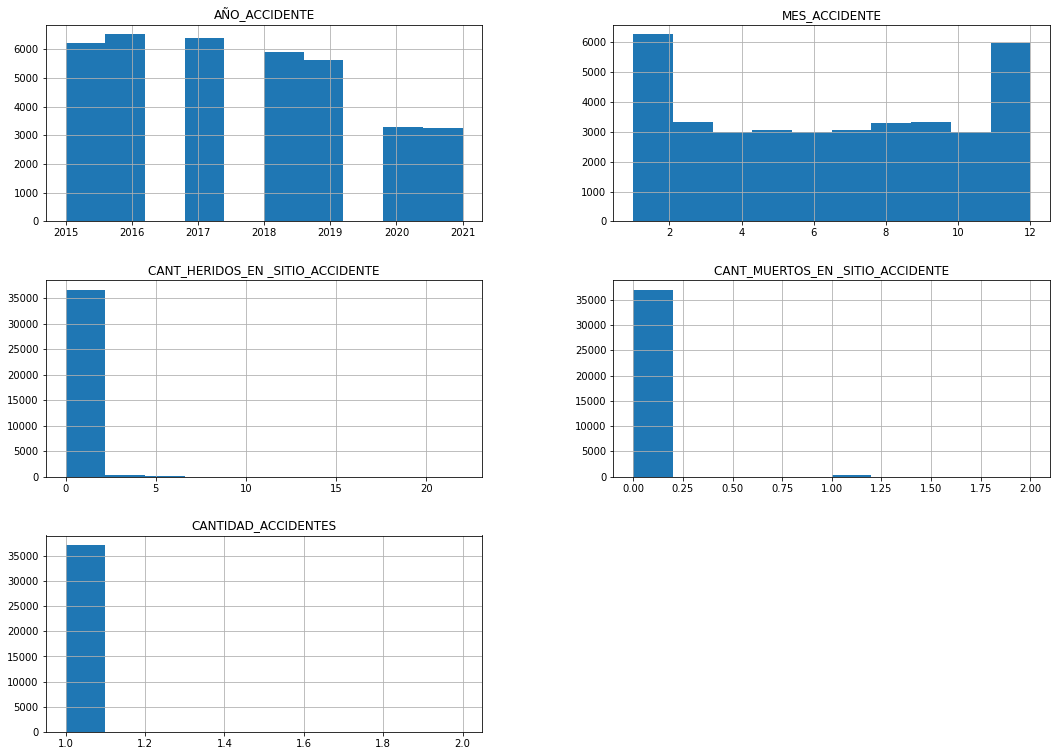

In [ ]:
df.hist(figsize=(18,13))

# ML

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
import numpy as np
label_encoder = LabelEncoder()

Parametros:
- CLASE
- GRAVEDAD
- SITIO

Resultado:
- Cantidad de Heridos
- Cantidad de Muertos

In [ ]:
df_muertos = df[["GRAVEDAD_ACCIDENTE","CLASE_ACCIDENTE","SITIO_EXACTO_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE"]]
df_muertos.columns = ["Gravedad","Clase","Lugar","Heridos"]
df_muertos = df_muertos.apply(lambda x: label_encoder.fit_transform(x))

array = df_muertos.values
parametros = array[:,0:3]
resultados = array[:,3]

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(parametros, resultados, test_size=0.20, random_state=1)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.938782 (0.000680)
LDA: 0.930290 (0.001557)
KNN: 0.820775 (0.002779)
CART: 0.915791 (0.004668)
NB: 0.932438 (0.001512)


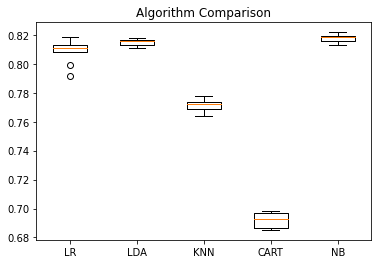

In [ ]:

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8143374949657672
[[5899   13    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 923  167    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 295   44    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  52    7    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  20    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  14    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0    0    0    0    0